In [1]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from operator import itemgetter
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
conn = sqlite3.connect('../../Data/Experiment_2/exp2_remote.db')
dat = pd.read_sql('SELECT * FROM trials A INNER JOIN subjects B ON A.subject_id = B.id WHERE B.completion=1', con=conn)

# Comprehension

In [4]:
dat.groupby('prolificID')#.count()

ValueError: Grouper for 'prolificID' not 1-dimensional

In [5]:
anim.to_csv('animate_moral_dat.csv', sep=',')

NameError: name 'anim' is not defined

In [4]:
anim = dat.loc[(dat.anim_check == 1) &
              (dat.tower_check == 1 ) & (dat.agent_check==1)]

In [6]:
inanim = dat[['inanim' in x for x in dat.exp_cond]]
inanim = inanim.loc[(dat.anim_check == 1) & (dat.tower_check == 1 )]

In [7]:
inanim.to_csv('inanimate_dat.csv', sep=',')

In [8]:
dat = pd.concat([anim, inanim])

NameError: name 'anim' is not defined

In [9]:
dat = pd.DataFrame(dat.values[:,~dat.columns.duplicated()], columns=dat.columns[~dat.columns.duplicated()])

len(dat.prolificID.unique())

392

In [10]:
ids = dat.groupby(['prolificID', 'exp_cond']).count()
nn = ids.loc[ids.subject_id > 1 ].sort_values('exp_cond').reset_index()

In [11]:

dat['cause_agent'] = dat['cause_agent'].apply(literal_eval)
dat['cause_patient'] = dat['cause_patient'].apply(literal_eval)
dat['num_moves_cause_agent'] = [len(x) for x in dat.cause_agent]
dat['agent'] = dat.cause_agent.map(lambda x: x[-1])
dat['num_moves_cause_patient'] = [len(x) for x in dat.cause_patient]
dat['patient'] = dat.cause_patient.map(lambda x:x[-1])
dat['exp_cond'] = dat.exp_cond.map(lambda x: x.split('_'))
dat[['animacy', 'norm_violation']] = dat['exp_cond'].transform({'item1': itemgetter(0), 'item2': itemgetter(1)})

xx = dat.groupby('prolificID').count().id > 1
extrasubs = xx.loc[xx.values == True].index.tolist()

In [12]:
yy = dat.loc[dat.prolificID == extrasubs[0]]

In [13]:
for subj in extrasubs:
    dat.drop(dat.loc[dat.prolificID == subj].index[0], inplace=True)
dat.reset_index(drop=True, inplace=True)

In [18]:
dat.to_csv('../../Data/Experiment_2/dat_brandon_1_11_22.csv', sep=',')


In [14]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')

Text(0.5, 1.0, 'Animate')

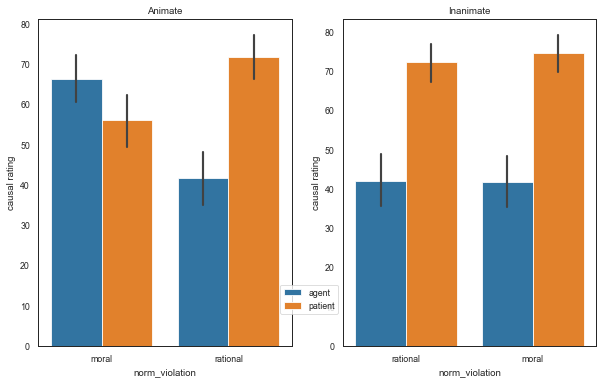

In [15]:
sns.set_context(context='paper')
f, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=2, sharey='col')
gg = sns.barplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', ax=ax[0])
#gg = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', dodge=True,  color=".2", ax=ax[0], label=None)
g = sns.barplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate', ax=ax[1])
#g = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate',dodge=True, color=".2", ax=ax[1], label='_nolegend_')  
gg.get_legend().remove()
g.legend(bbox_to_anchor=(0., 0.2, 0., 0.))
g.set_title('Inanimate')
gg.set_title('Animate')
#plt.savefig('exp2_pilota.png')

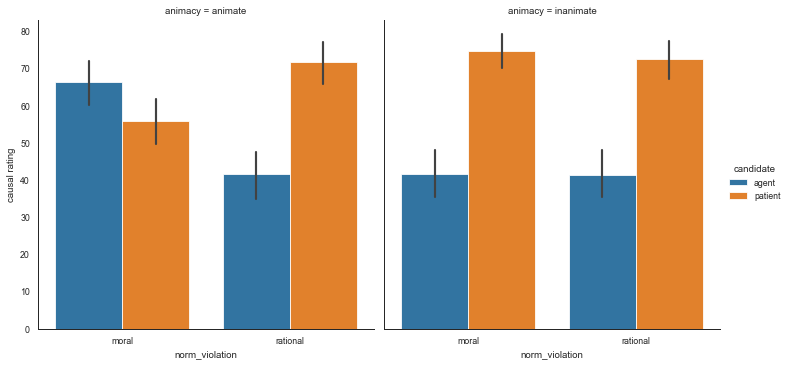

In [11]:
sns.catplot(x='norm_violation', y='causal rating', hue='candidate', col='animacy', kind='bar', data=dat_long)



In [20]:

dat.groupby(['animacy','norm_violation']).count()

id  prolificID  jspsychID  time_elapse  cause_agent  \
animacy   norm_violation                                                        
animate   moral           97          97         97           97           97   
          rational        97          97         97           97           97   
inanimate moral           97          97         97           97           97   
          rational        97          97         97           97           97   

                          cause_patient  cause_agent_rt  cause_patient_rt  \
animacy   norm_violation                                                    
animate   moral                      97              97                97   
          rational                   97              97                97   
inanimate moral                      97              97                97   
          rational                   97              97                97   

                          anim_check  tower_check  ...  sub_feedback2  \
animacy   norm_violation                           ...                  
animate   moral                   97           97  ...             97   
          rational                97           97  ...             97   
inanimate moral                   97           97  ...             97   
          rational                97           97  ...             89   

                          subject_id  date  completion  compelete_time  \
animacy   norm_violation                                                 
animate   moral                   97    97          97               0   
          rational                97    97          97               0   
inanimate moral                   97    97          97               0   
          rational                97    97          97               0   

                          exp_cond  num_moves_cause_agent  agent  \
animacy   norm_violation                                           
animate   moral                 97                     97     97   
          rational              97                     97     97   
inanimate moral                 97                     97     97   
          rational              97                     97     97   

                          num_moves_cause_patient  patient  
animacy   norm_violation                                    
animate   moral                                97       97  
          rational                             97       97  
inanimate moral                                97       97  
          rational                             97       97  

[4 rows x 22 columns]

In [19]:
dat=dat.loc[~dat.id.isin([217,126, 98, 93])]

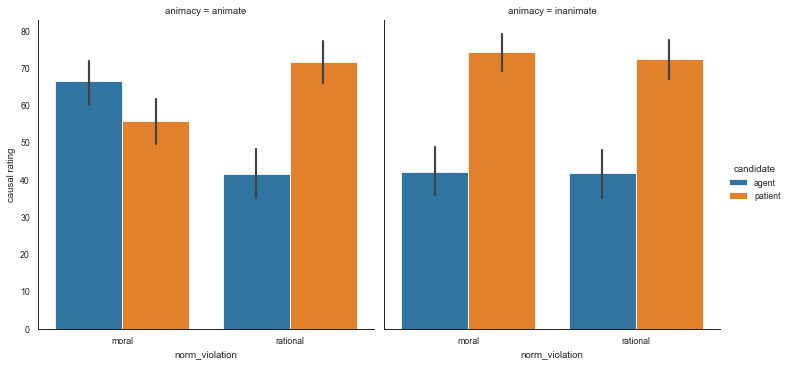

In [21]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')

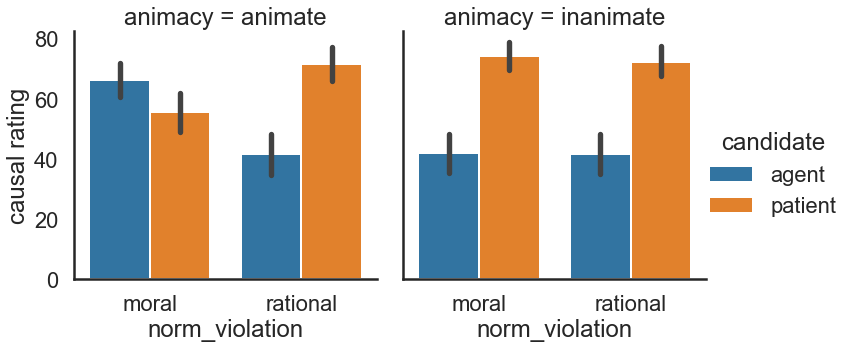

In [25]:
#sns.set_context('poster')
sns.catplot(x='norm_violation', y='causal rating', hue='candidate', col='animacy', kind='bar', data=dat_long)
plt.savefig('Figures/exp2_causexcond.png')